In [2]:
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect

In [167]:
full_movie = pd.read_csv('title.akas.tsv.gz', sep = '\t', compression = 'gzip')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\253762282.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  full_movie = pd.read_csv('title.akas.tsv.gz', sep = '\t', compression = 'gzip')


(35863473, 8)

In [3]:
#Import the needed datas
#Read the datas
movies = pd.read_csv('titles.csv')
act_on_movies = pd.read_pickle('act_on_movies.pkl')

In [4]:
title_full = movies.merge(act_on_movies, how = 'left', on = 'tconst')
title_full.drop(columns = ['endYear'], inplace=True)
title_full_noNaN = title_full.dropna()
title_full_noNaN.reset_index(inplace = True)

In [5]:
title_full_noNaN['genres']

0                            Romance
1                                 \N
2         Action,Adventure,Biography
3                              Drama
4                              Drama
                     ...            
294898                 Drama,History
294899         Adventure,History,War
294900                        Comedy
294901                         Drama
294902                            \N
Name: genres, Length: 294903, dtype: object

In [6]:
#Get a list of genres per movie
title_full_noNaN= title_full_noNaN[title_full_noNaN['genres'] != '\\N']
title_full_noNaN['genres'] = title_full_noNaN['genres'].apply(lambda x : x.split(','))

#title_full_noNaN['genres'] = title_full_noNaN['genres'].apply(lambda x : "[]" if x == '\\N' else x)\
 #   .apply(lambda x : x.split(','))

In [7]:
#Get the median
med_tvMovie = title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='tvMovie') & (title_full_noNaN['runtimeMinutes']!='\\N')].median()
med_movie = title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='movie') & (title_full_noNaN['runtimeMinutes']!='\\N')].median()

#Replace the missing values
title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='movie') & (title_full_noNaN['runtimeMinutes']=='\\N')]=med_movie
title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='tvMovie') & (title_full_noNaN['runtimeMinutes']=='\\N')]=med_tvMovie

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\2582152373.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='movie') & (title_full_noNaN['runtimeMinutes']=='\\N')]=med_movie
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\2582152373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_full_noNaN['runtimeMinutes'][(title_full_noNaN['titleType']=='tvMovie') & (title_full_noNaN['runtimeMinutes']=='\\N')]=med_tvMovie


In [8]:
df.drop_duplicates(subset = df[['originalTitle' ,'primaryTitle', 'startYear']], inplace = True)

NameError: name 'df' is not defined

In [ ]:
df = df[df['titleType']=='movie']
df['runtimeMinutes'] = df['runtimeMinutes'].apply(int)
df = df[df['runtimeMinutes']>60]
df = df[df['numVotes']>500]

In [ ]:
s = df['genres']
df = pd.concat([df , pd.get_dummies(s.explode()).groupby(level=0).sum()], 
          axis = 1)

In [ ]:
#isAdult, averageRating, runtimeMinutes, (Year?), genres (get_dummies)
columns_of_interest = ['isAdult', 'runtimeMinutes', 'averageRating'] + list(df.iloc[:, -26:].columns)
X= df[columns_of_interest]
distanceKNN = NearestNeighbors(n_neighbors = 6).fit(X)
title = df['originalTitle'][294897]
coord = distanceKNN.kneighbors(df.loc[df['originalTitle']==title, columns_of_interest])

In [ ]:
for i in range(1, 6):
    print('You entered :', title, ', so we recommand :', 'TOP', i, ':' , df['originalTitle'].iloc[coord[1][0][i]])

In [ ]:
# Problems : 1 - Ratings in recommandation system, 
# 2 - Streamlit search bar very slow to load all these things, 
# 3 - What weight to give to every columns in the algorithm (most important : Genres ?) - Standardize 

In [ ]:
df.to_csv('test_over500.csv')

In [168]:
df = pd.read_csv('test_over500.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\1683575876.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('test_over500.csv')


In [169]:
full_movie.head(10)#[full_movie['isOriginalTitle']==1]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0


In [170]:
test_df = full_movie[['titleId', 'region']].groupby(by = 'titleId')['region'].apply(list)

KeyboardInterrupt: 

In [15]:
region_per_movie = pd.DataFrame(test_df)

In [18]:
region_per_movie[region_per_movie['region'].apply(lambda x : 'US' not in x or 'GB' not in x)]

,region
titleId,
tt0000001,"[UA, DE, HU, GR, RU, US, \N, JP]"
tt0000002,"[\N, FR, HU, DE, RO, RU, US, JP]"
tt0000003,"[RO, HU, JP, UA, RU, \N, GB, FR, DE]"
tt0000004,"[\N, FR, DE, RO, RU, JP, \N, HU]"
tt0000006,"[RU, PT, US, HU, \N, DE]"
...,...
tt9916846,"[FR, DE, JP, PT, IN, IT, ES]"
tt9916848,"[FR, DE, JP, PT, IT, IN, ES]"
tt9916850,"[PT, IN, FR, JP, IT, ES, DE]"


In [42]:
#US_movie = region_per_movie[region_per_movie['region'].apply(lambda x : 'US' not in x)]
US_movie = region_per_movie[region_per_movie['region'].apply(lambda x : 'US' not in x and 'GB' not in x)]
Non_USmovie = region_per_movie[region_per_movie['region'].apply(lambda x : 'US' in x or 'GB' in x)]
IN_movie = region_per_movie[region_per_movie['region'].apply(lambda x : 'IN' not in x)]

In [77]:
new_df = df.merge(US_movie, how = 'left', left_on = 'tconst', right_on = 'titleId')
final_df = new_df.merge(Non_USmovie, how = 'left', left_on = 'tconst', right_on = 'titleId')

In [78]:
final_df['origin'] = 0
final_df['origin'][(final_df['region_x'].apply(lambda x : len(x) if type(x) == list else 0)>5)]='US'
final_df['origin'][(final_df['region_y'].apply(lambda x : len(x) if type(x) == list else 0)>5)]='Not US'
final_df_filter = final_df[final_df['origin']!=0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\178404402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['origin'][(final_df['region_x'].apply(lambda x : len(x) if type(x) == list else 0)>5)]='US'


In [38]:
(final_df['region_x'].apply(lambda x : len(x) if type(x) == list else 0)>5).sum())
(final_df['region_y'].apply(lambda x : len(x) if type(x) == list else 0)>5).sum()

2512


41876

In [81]:
final_df_filter.to_csv('test_over500_over5translation.csv')

In [102]:
final_df_filter['originalTitle'][final_df_filter['originalTitle'].apply(lambda x : x.isnumeric())]

0           The Story of the Kelly Gang
1                             Cleopatra
2                             L'Inferno
3                        Madame DuBarry
4                         Ingeborg Holm
                      ...              
54279                         Manoharam
54280                  Eight for Silver
54281                           Le lion
54282    De beentjes van Sint-Hildegard
54284                          Akelarre
Name: originalTitle, Length: 48060, dtype: object

In [122]:
final_df_filter['originalTitle'][final_df_filter['originalTitle'].apply(lambda x : len(x)<4) | final_df_filter['originalTitle'].apply(lambda x : x.isnumeric())]

222       Mat
248        It
1017      She
2579      Ivy
3103      Kim
         ... 
53504     LKG
53894    3022
54003     Adú
54198     Håp
54267     VFW
Name: originalTitle, Length: 414, dtype: object

In [188]:
def detect_language(title):
    print(title)
    return detect(title)

In [189]:
def filtering_title(raw_title):
    if raw_title.isalpha() or ' ' in raw_title:
        return True
    elif raw_title.isnumeric():
        return True

In [224]:
short_top3000_df = final_df_filter.sort_values(by = 'numVotes', ascending = False).head(3000)

In [226]:
short_top3000_df['Language'] = short_top3000_df[short_top3000_df['originalTitle'].apply(lambda x : x.isalpha() or ' ' in x)]['originalTitle'].apply(detect_language)

The Shawshank Redemption
The Dark Knight
Inception
Fight Club
Forrest Gump
Pulp Fiction
The Matrix
The Lord of the Rings: The Fellowship of the Ring
The Godfather
Interstellar
The Lord of the Rings: The Return of the King
The Dark Knight Rises
The Lord of the Rings: The Two Towers
Django Unchained
Gladiator
Batman Begins
Inglourious Basterds
The Silence of the Lambs
The Wolf of Wall Street
Saving Private Ryan
The Avengers
Star Wars
Schindler's List
The Prestige
Shutter Island
The Departed
Joker
Avatar
The Green Mile
The Empire Strikes Back
The Godfather Part II
Memento
Back to the Future
Titanic
Guardians of the Galaxy
GoodFellas
Léon
Avengers: Endgame
American Beauty
Pirates of the Caribbean: The Curse of the Black Pearl
American History X
V for Vendetta
Kill Bill: Vol. 1
Terminator 2: Judgment Day
Avengers: Infinity War
The Truman Show
The Usual Suspects
The Lion King
Iron Man
Star Wars: Episode VI - Return of the Jedi
Up
Finding Nemo
Deadpool
Braveheart
The Shining
Reservoir Dogs
Et

Terminator Salvation
The Suicide Squad
Ferris Bueller's Day Off
Avatar: The Way of Water
Cloud Atlas
The Lego Movie
Brokeback Mountain
Moon
Mulholland Dr.
Anchorman: The Legend of Ron Burgundy
Mission: Impossible III
50 First Dates
Wedding Crashers
About Time
Flight
Raging Bull
Der Untergang
Scream
Hotel Rwanda
Super 8
Boyhood
Night at the Museum
Once Upon a Time in America
The Ring
Solo: A Star Wars Story
Thor: Love and Thunder
The Gentlemen
Jackie Brown
Constantine
Jumanji
Bird Box
Moonrise Kingdom
Eternals
10 Things I Hate About You
Ocean's Thirteen
Eyes Wide Shut
The Expendables
Shichinin no samurai
Mission: Impossible II
Tonari no Totoro
The Nightmare Before Christmas
Due Date
Moana
Jack Reacher
Bullet Train
Midsommar
Pineapple Express
How to Train Your Dragon 2
True Grit
The Rock
The Deer Hunter
Tron
Mission: Impossible - Fallout
Soul
Being John Malkovich
The Blind Side
Meet the Parents
National Treasure
Kingsman: The Golden Circle
Up in the Air
Shooter
The Hunger Games: Mockingj

The Chronicles of Narnia: Prince Caspian
Planet Terror
Rocky IV
A Walk to Remember
Ice Age: Continental Drift
Austin Powers in Goldmember
The Gray Man
EuroTrip
Teenage Mutant Ninja Turtles
Coming to America
A Series of Unfortunate Events
P.S. I Love You
Shrek Forever After
El secreto de sus ojos
Lara Croft: Tomb Raider
What Women Want
Death Race
Ghostbusters II
The Tomorrow War
Mad Max
Extraction
The Adam Project
Traffic
The Emperor's New Groove
G.I. Joe: The Rise of Cobra
The Happening
I Love You, Man
American Wedding
Hansel & Gretel: Witch Hunters
Oz the Great and Powerful
Fracture
A Good Day to Die Hard
Love & Other Drugs
Enchanted
Serbuan maut
South Park: Bigger, Longer & Uncut
Drag Me to Hell
The Internship
Finding Neverland
Darkest Hour
Willy Wonka & the Chocolate Factory
Straight Outta Compton
The Secret Life of Pets
Close Encounters of the Third Kind
Transporter 2
The Iron Giant
Blue Jasmine
The Favourite
Basic Instinct
Who Framed Roger Rabbit
17 Again
You Don't Mess with the Z

The Lost Boys
Billy Madison
Die unendliche Geschichte
13 Hours
Lars and the Real Girl
Kramer vs. Kramer
Seven Years in Tibet
Good Bye Lenin!
Fun with Dick and Jane
Never Let Me Go
Under the Skin
Bad Santa
Last Night in Soho
Maze Runner: The Death Cure
Escape from New York
Smokin' Aces
Awakenings
Killing Them Softly
RRR (Rise Roar Revolt)
A Bronx Tale
Mr. Deeds
Kôkaku kidôtai
The Negotiator
Tower Heist
The Grudge
Rope
Bambi
My Best Friend's Wedding
The Nun
Final Destination 3
We Bought a Zoo
A Fish Called Wanda
Lost Highway
Alice in Wonderland
The Texas Chainsaw Massacre
Love, Rosie
Sonic the Hedgehog
We Were Soldiers
Good Morning, Vietnam
Big Trouble in Little China
This Is 40
Resident Evil: Retribution
Winter's Bone
Friday the 13th
A Serious Man
Boyz n the Hood
Hocus Pocus
Brooklyn
It's Kind of a Funny Story
Borat Subsequent Moviefilm: Delivery of Prodigious Bribe to American Regime for Make Benefit Once Glorious Nation of Kazakhstan
Foxcatcher
Peter Pan
Barbarian
Spring Breakers
The 

The Final Destination
The Rundown
Glengarry Glen Ross
Crocodile Dundee
Diamonds Are Forever
Smultronstället
Get the Gringo
Faster
The Three Musketeers
Primer
Meet the Spartans
Fright Night
Not Another Teen Movie
The Full Monty
Tango & Cash
Fast Times at Ridgemont High
Dag II
U.S. Marshals
Shanghai Knights
Jingle All the Way
The Interpreter
August Rush
Zathura: A Space Adventure
Sphere
Octopussy
The Switch
Le scaphandre et le papillon
The Man with the Golden Gun
The King of Comedy
Attack the Block
Dinner for Schmucks
Repo Men
Heathers
The Wolfman
Behind Enemy Lines
Pet Sematary
Insidious: Chapter 3
The Cloverfield Paradox
The AristoCats
Little Nicky
Super Troopers
Rescue Dawn
Movie 43
United 93
Brahmastra Part One: Shiva
Bedazzled
Scrooged
In the Line of Fire
Brick
Child's Play
Cool Runnings
Cloudy with a Chance of Meatballs 2
Yip Man 2
Licence to Kill
Bean
Four Rooms
Gremlins 2: The New Batch
Legion
The X Files
Cars 3
Journey 2: The Mysterious Island
Anaconda
While You Were Sleeping
Le

The Cat in the Hat
Idi i smotri
The Squid and the Whale
Judas and the Black Messiah
This Is Where I Leave You
Paterson
Bom yeoreum gaeul gyeoul geurigo bom
Pretty in Pink
The Bridges of Madison County
Tropa de Elite 2: O Inimigo Agora é Outro
Look Who's Talking
The Inbetweeners Movie
Solaris
The Princess Diaries 2: Royal Engagement
The Wicker Man
À bout de souffle
Ôdishon
Paddington 2
Centurion
Munna Bhai M.B.B.S.
My Girl
Star Trek: Generations
An Inconvenient Truth
Surf's Up
Beasts of the Southern Wild
Fighting with My Family
Beverly Hills Cop III
The Hustler
Snake Eyes
G.I. Jane
Midnight Express
Stir of Echoes
Suspiria
Siu Lam juk kau
A Beautiful Day in the Neighborhood
Beasts of No Nation
Hidalgo
Office Christmas Party
Last Christmas
Fruitvale Station
Enter the Void
The New Mutants
Space Cowboys
The Day the Earth Stood Still
Backdraft
A Perfect World
Sorry to Bother You
Mar adentro
Speed 2: Cruise Control
Mandy
The Wedding Planner
Saturday Night Fever
The Flintstones
Jigsaw
Star Tre

In [227]:
short_top3000_df['origin'] = 0
short_top3000_df['origin'][short_top3000_df['Language']!='en']='Not US'
short_top3000_df['origin'][short_top3000_df['Language']=='en']='US'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\3362053511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_top3000_df['origin'][short_top3000_df['Language']!='en']='Not US'


In [228]:
short_top3000_df.to_csv('maxi_filtered_df3000.csv')

In [223]:
short_top3000_df

,Unnamed: 0.2,Unnamed: 0.1,index,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,...,Romance.2,Sci-Fi.2,Sport.2,Thriller.2,War.2,Western.2,region_x,region_y,origin,Language
19178,19825,89583,123608,123608,tt0185442,movie,Love & Rage,Love & Rage,0,1999,...,0,0,0,0,0,0,NaN,"['ES', 'GB', 'AR', 'AU', 'FR', 'IT', 'BR', 'PL...",Not US,da
12674,12918,53104,69751,69751,tt0092160,movie,Friends Forever,Venner for altid,0,1986,...,0,0,0,0,0,0,NaN,"['DK', 'SE', '\\N', 'SE', 'TR', 'CA', 'XWG', '...",Not US,no
9515,9667,41445,56329,56329,tt0075414,movie,We Can't Go Home Again,We Can't Go Home Again,0,1973,...,0,0,0,0,0,0,NaN,"['US', 'IT', 'SUHH', 'US', 'IT', 'JP', '\\N', ...",US,en
10643,10814,45788,61290,61290,tt0081536,movie,I'm Photogenic,Sono fotogenico,0,1980,...,0,0,0,0,0,0,"['AR', 'RU', 'JP', 'PL', 'DE', 'XWW', 'IT', '\...",NaN,Not US,it
17991,18477,73997,95247,95247,tt0128842,movie,The Wiggles Movie,The Wiggles Movie,0,1997,...,0,0,0,0,0,0,NaN,"['US', 'DE', 'US', 'AU', '\\N', 'FR', 'GB', 'MX']",US,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41592,46656,255513,634116,634116,tt4505170,movie,Detective K: Secret of the Lost Island,Joseon Myungtamjung: Nobui Ddal,0,2015,...,0,0,0,0,0,0,NaN,"['US', '\\N', 'AU', 'UY', 'JP', 'VN', 'XWW', '...",Not US,id
34,35,704,2918,2918,tt0008395,movie,Father Sergius,Otets Sergiy,0,1918,...,0,0,0,0,0,0,"['XWW', 'JP', '\\N', 'NO', 'ES', 'FR', 'DK', '...",NaN,Not US,no
27385,29742,162255,280752,280752,tt1029123,movie,I Know You Know,I Know You Know,0,2008,...,0,0,0,0,0,0,NaN,"['HU', 'GB', 'RO', 'GR', 'RS', '\\N', 'IR', 'US']",Not US,pl
21051,22185,115650,175668,175668,tt0285156,movie,What Boys Like,The Groomsmen,0,2003,...,0,0,0,0,0,0,NaN,"['US', 'BR', 'ZA', 'DE', 'RS', 'DE', 'HU', 'GB...",US,en


In [128]:
final_df_filter['Language'] = final_df_filter['originalTitle'][final_df_filter['originalTitle'].apply(lambda x : len(x)<3) | final_df_filter['originalTitle'].apply(lambda x : x.isnumeric())].apply(detect_language)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\2568322897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_filter['Language'] = final_df_filter['originalTitle'][final_df_filter['originalTitle'].apply(lambda x : len(x)<3) | final_df_filter['originalTitle'].apply(lambda x : x.isnumeric())].apply(detect_language)


,Unnamed: 0.2,Unnamed: 0.1,index,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,...,Reality-TV.2,Romance.2,Sci-Fi.2,Sport.2,Thriller.2,War.2,Western.2,region_x,region_y,origin
0,0,2,3,3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,...,0,0,0,0,0,0,0,NaN,"['AU', 'HU', 'AU', 'RS', 'GB', '\\N', 'SG', 'U...",Not US
1,1,45,126,126,tt0002101,movie,Cleopatra,Cleopatra,0,1912,...,0,0,0,0,0,0,0,NaN,"['\\N', 'DK', 'GR', 'RU', 'US', 'US', 'US', '\...",Not US
2,2,46,132,132,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,...,0,0,0,0,0,0,0,NaN,"['FI', 'HU', 'IT', 'JP', '\\N', 'US', 'IT', 'B...",Not US
3,3,56,168,168,tt0002423,movie,Passion,Madame DuBarry,0,1919,...,0,1,0,0,0,0,0,NaN,"['SE', 'JP', 'FR', 'PL', 'GB', 'BG', 'HU', 'ES...",Not US
4,4,88,268,268,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,...,0,0,0,0,0,0,0,"['\\N', 'RS', 'IT', 'DK', '\\N', 'SE', 'HU', '...",NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48127,54279,294866,784930,784930,tt9906644,movie,Manoharam,Manoharam,0,2019,...,0,0,0,0,0,0,0,NaN,"['CA', 'US', 'IT', 'GB', '\\N', 'IN']",Not US
48128,54280,294868,784939,784939,tt9907782,movie,The Cursed,Eight for Silver,0,2021,...,0,0,0,0,0,0,0,NaN,"['SG', 'RU', 'TR', 'CA', 'BR', 'SE', 'KR', 'FR...",Not US
48129,54281,294870,784942,784942,tt9908390,movie,Le lion,Le lion,0,2020,...,0,0,0,0,0,0,0,"['HR', 'PT', 'PL', 'RU', 'SG', 'DE', 'HU', 'RS...",NaN,US
48130,54282,294880,785048,785048,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,...,0,0,0,0,0,0,0,NaN,"['US', 'GB', 'HK', 'ES', 'XWW', '\\N', 'FR', '...",Not US


In [143]:
final_df_filter['Language'] = final_df_filter['originalTitle'].apply(detect_language)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\467645461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_filter['Language'] = final_df_filter['originalTitle'].apply(detect_language)


In [144]:
final_df_filter['Language'][final_df_filter['Language']=="Error"]

0        Error
1        Error
2        Error
3        Error
4        Error
         ...  
54279    Error
54280    Error
54281    Error
54282    Error
54284    Error
Name: Language, Length: 48132, dtype: object

In [136]:
final_df_filter['originalTitle'][final_df_filter['Language']=="Error"][final_df_filter['originalTitle'].apply(lambda x : len(x)<3) | final_df_filter['originalTitle'].apply(lambda x : x.isnumeric())]

248        It
3309        M
3589       Él
4203     1984
5761       8½
         ... 
53041    1917
53120     118
53209      KD
53440       Z
53894    3022
Name: originalTitle, Length: 133, dtype: object

In [142]:
final_df_filter['Language'][final_df_filter['Language']=="Error"].index == final_df_filter['originalTitle'][final_df_filter['Language']=="Error"][final_df_filter['originalTitle'].apply(lambda x : len(x)<3) | final_df_filter['originalTitle'].apply(lambda x : x.isnumeric())].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [137]:
final_df_filter['Language_bis'] = final_df_filter['originalTitle'][final_df_filter['originalTitle'].apply(lambda x : len(x)>3) | final_df_filter['originalTitle'].apply(lambda x : x.isnumeric()==False)].apply(lambda x : detect(x))

LangDetectException: No features in text.

In [ ]:
US_movie[US_movie['titleId'].apply(lambda x : x in final_df['tconst'][final_df['Origin']=='US'])]

In [148]:
final_df['tconst'][final_df['Origin']=='US']

4        tt0003014
29       tt0007183
35       tt0008395
39       tt0008663
52       tt0009900
           ...    
54257    tt9886872
54261    tt9892338
54265    tt9894440
54281    tt9908390
54283    tt9916270
Name: tconst, Length: 7033, dtype: object

In [109]:
full_movie.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0


In [ ]:
full_movie[full_movie['isOriginalTitle']==1 & full_movie['region']=='\\N']

In [98]:
final_df = new_df.merge(Non_USmovie, how = 'left', left_on = 'tconst', right_on = 'titleId')

In [65]:
final_df['region_y'][final_df['region_x'].isna()]

0                 [AU, HU, AU, RS, GB, \N, SG, US, \N, DE]
1                     [\N, DK, GR, RU, US, US, US, \N, GB]
2        [FI, HU, IT, JP, \N, US, IT, BR, FR, PL, RU, F...
3        [SE, JP, FR, PL, GB, BG, HU, ES, BR, \N, US, D...
5        [FI, FR, US, IT, FI, US, RU, DE, ES, FI, UA, D...
                               ...                        
54278                                     [\N, IN, US, IN]
54279                             [CA, US, IT, GB, \N, IN]
54280    [SG, RU, TR, CA, BR, SE, KR, FR, EG, \N, CO, H...
54282               [US, GB, HK, ES, XWW, \N, FR, NL, XWW]
54284    [HU, CA, FR, ES, ES, \N, EG, MX, GR, US, IT, B...
Name: region_y, Length: 47304, dtype: object

In [111]:
final_df.to_csv('test_over500_USnonUS.csv')

In [115]:
final_df

,Unnamed: 0.1,index,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,...,Mystery.2,News.2,Reality-TV.2,Romance.2,Sci-Fi.2,Sport.2,Thriller.2,War.2,Western.2,Origin
0,2,3,3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,...,0,0,0,0,0,0,0,0,0,Not US
1,45,126,126,tt0002101,movie,Cleopatra,Cleopatra,0,1912,100,...,0,0,0,0,0,0,0,0,0,Not US
2,46,132,132,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,71,...,0,0,0,0,0,0,0,0,0,Not US
3,56,168,168,tt0002423,movie,Passion,Madame DuBarry,0,1919,85,...,0,0,0,1,0,0,0,0,0,Not US
4,88,268,268,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,96,...,0,0,0,0,0,0,0,0,0,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54280,294868,784939,784939,tt9907782,movie,The Cursed,Eight for Silver,0,2021,111,...,1,0,0,0,0,0,0,0,0,Not US
54281,294870,784942,784942,tt9908390,movie,Le lion,Le lion,0,2020,95,...,0,0,0,0,0,0,0,0,0,US
54282,294880,785048,785048,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,103,...,0,0,0,0,0,0,0,0,0,Not US
54283,294897,785142,785142,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,...,0,0,0,0,0,0,1,0,0,US


In [114]:
df

,Unnamed: 0.1,index,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,...,Musical.2,Mystery.2,News.2,Reality-TV.2,Romance.2,Sci-Fi.2,Sport.2,Thriller.2,War.2,Western.2
0,2,3,3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,...,0,0,0,0,0,0,0,0,0,0
1,45,126,126,tt0002101,movie,Cleopatra,Cleopatra,0,1912,100,...,0,0,0,0,0,0,0,0,0,0
2,46,132,132,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,71,...,0,0,0,0,0,0,0,0,0,0
3,56,168,168,tt0002423,movie,Passion,Madame DuBarry,0,1919,85,...,0,0,0,0,1,0,0,0,0,0
4,88,268,268,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,96,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54280,294868,784939,784939,tt9907782,movie,The Cursed,Eight for Silver,0,2021,111,...,0,1,0,0,0,0,0,0,0,0
54281,294870,784942,784942,tt9908390,movie,Le lion,Le lion,0,2020,95,...,0,0,0,0,0,0,0,0,0,0
54282,294880,785048,785048,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,103,...,0,0,0,0,0,0,0,0,0,0
54283,294897,785142,785142,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

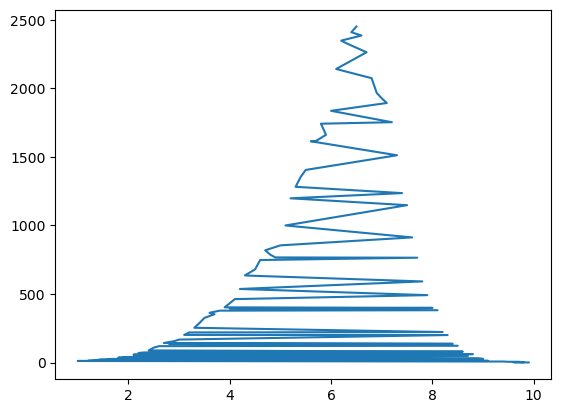

In [267]:
df['averageRating'].value_counts().plot()

<Axes: xlabel='startYear', ylabel='Count'>

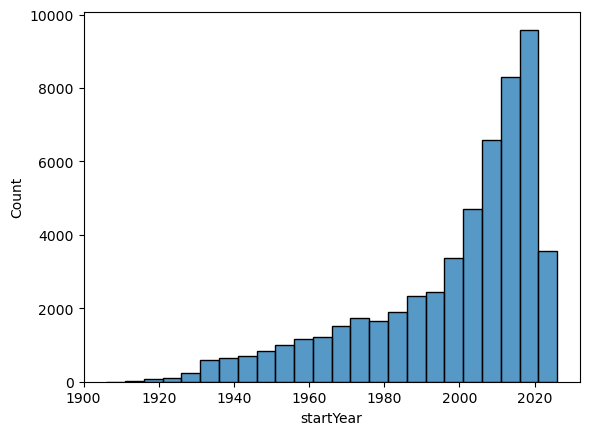

In [299]:
# The years of the movies present in our database 
sns.histplot(data = df['startYear'][df['startYear']!='\\N'].apply(lambda x : int(x)), binwidth = 5)

In [300]:
df.columns

Index(['index', 'Unnamed: 0', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'directors', 'nconst', 'primaryName',
       'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Talk-Show', 'Thriller',
       'War', 'Western', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror

In [11]:
#The most represented genres
#df = pd.read_csv('titles.csv')
df_ov500 = pd.read_csv('test_over500.csv')
df_ov500 = df_ov500.iloc[:, 0:42]
#df = pd.read_csv('maxi_filtered_df3000.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11028\2071075679.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ov500 = pd.read_csv('test_over500.csv')


In [3]:
df = pd.read_csv('titles.csv')

In [15]:
df_ov500[['Action.1', 'Action.2']].s

Action.1    9470
Action.2    9470
dtype: int64

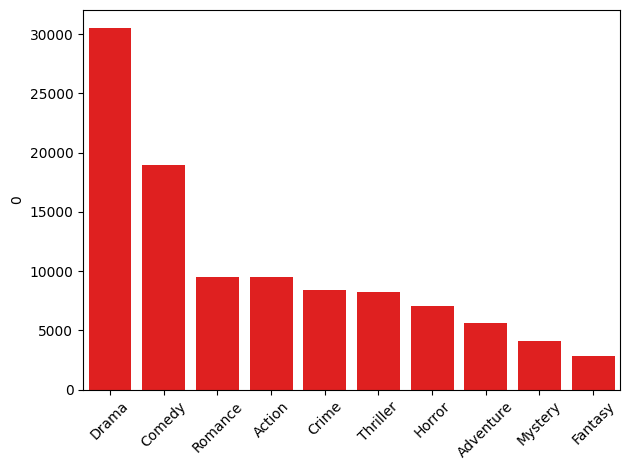

In [50]:
#A presentation of our database
top10 = pd.DataFrame(df_ov500.iloc[:, 16:].sum().sort_values(ascending = False).head(10))
fig, ax = plt.subplots()
sns.barplot(x = top10.index, y = top10.iloc[:, 0], color = 'red')
plt.xticks(rotation = 45)
fig.tight_layout()
plt.show()

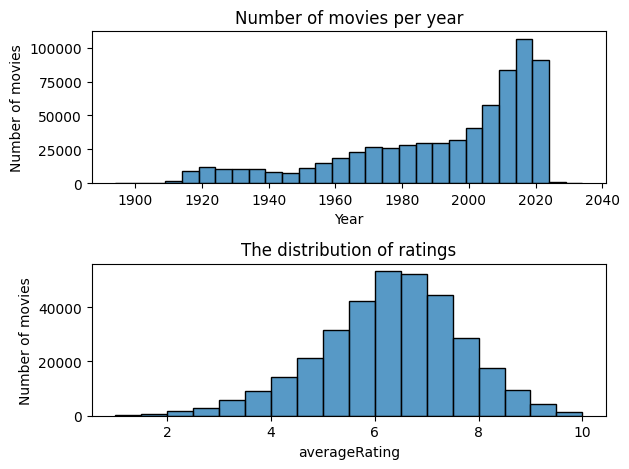

In [35]:
#Presentation of the database :
#The ratings
fig, ax = plt.subplots(2, 1)
sns.histplot(data = df['startYear'][df['startYear']!='\\N'].apply(lambda x : int(x)), binwidth = 5, ax = ax[0])
ax[0].set_title('Number of movies per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of movies')
sns.histplot(data = df, x = 'averageRating', binwidth = 0.5, ax = ax[1])
ax[1].set_title('The distribution of ratings')
ax[1].set_ylabel('Number of movies')
fig.tight_layout()
plt.show()

<Axes: xlabel='averageRating', ylabel='runtimeMinutes'>

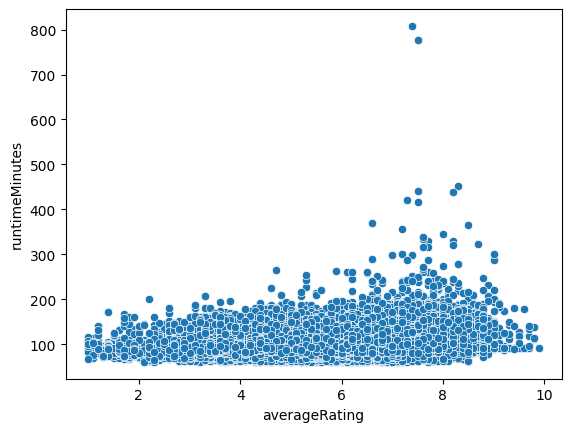

In [252]:
#The ratings 
sns.scatterplot(data = df, x = 'averageRating', y = 'runtimeMinutes')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11028\668169226.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_year = df[['startYear', 'runtimeMinutes']][df['runtimeMinutes']!="\\N"][df['startYear']!="\\N"].groupby(by = df['startYear']).mean()


<Axes: xlabel='startYear', ylabel='runtimeMinutes'>

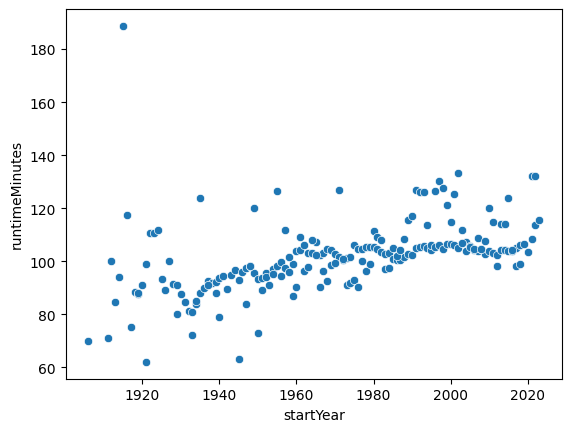

In [57]:
#The evolution of the cinema over the years
df = df_ov500
mean_per_year = df[['startYear', 'runtimeMinutes']][df['runtimeMinutes']!="\\N"][df['startYear']!="\\N"].groupby(by = df['startYear']).mean()
sns.scatterplot(data = mean_per_year, x = 'startYear', y = 'runtimeMinutes')

In [64]:
#mean_per_year[mean_per_year['runtimeMinutes']>180]
df[df['startYear']==1915]

,Unnamed: 0.1,index,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
20,261,891,891,tt0004972,movie,The Birth of a Nation,The Birth of a Nation,0,1915,195,...,0,0,0,0,0,0,0,0,1,0
21,298,1061,1061,tt0005339,movie,A Fool There Was,A Fool There Was,0,1915,67,...,0,0,0,0,0,0,0,0,0,0
22,368,1385,1385,tt0005960,movie,The Regeneration,The Regeneration,0,1915,72,...,0,0,0,0,0,0,0,0,0,0
23,389,1510,1510,tt0006206,movie,Les vampires,Les vampires,0,1915,421,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\320887811.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_year = df[['startYear', 'averageRating']][df['averageRating']!="\\N"][df['startYear']!="\\N"].groupby(by = df['startYear']).mean()


<Axes: xlabel='startYear', ylabel='averageRating'>

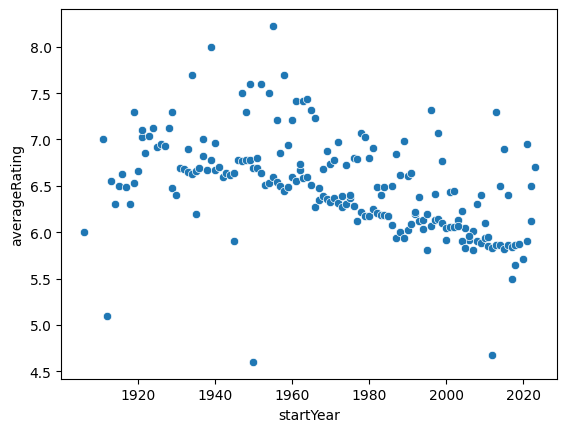

In [262]:
mean_per_year = df[['startYear', 'averageRating']][df['averageRating']!="\\N"][df['startYear']!="\\N"].groupby(by = df['startYear']).mean()
sns.scatterplot(data = mean_per_year, x = 'startYear', y = 'averageRating')

In [263]:
df.shape

(54285, 92)

In [261]:
columns_of_interest = ['startYear'] + list(df.iloc[:, -26:].columns)
mean_per_year_genres = df[columns_of_interest].groupby(by = df['startYear']).sum()
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7792\924781197.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_per_year_genres = df[columns_of_interest].groupby(by = df['startYear']).sum()


,Unnamed: 0.1,index,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,...,Musical.2,Mystery.2,News.2,Reality-TV.2,Romance.2,Sci-Fi.2,Sport.2,Thriller.2,War.2,Western.2
0,2,3,3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,...,0,0,0,0,0,0,0,0,0,0
1,45,126,126,tt0002101,movie,Cleopatra,Cleopatra,0,1912,100,...,0,0,0,0,0,0,0,0,0,0
2,46,132,132,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,71,...,0,0,0,0,0,0,0,0,0,0
3,56,168,168,tt0002423,movie,Passion,Madame DuBarry,0,1919,85,...,0,0,0,0,1,0,0,0,0,0
4,88,268,268,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,96,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54280,294868,784939,784939,tt9907782,movie,The Cursed,Eight for Silver,0,2021,111,...,0,1,0,0,0,0,0,0,0,0
54281,294870,784942,784942,tt9908390,movie,Le lion,Le lion,0,2020,95,...,0,0,0,0,0,0,0,0,0,0
54282,294880,785048,785048,tt9911196,movie,The Marriage Escape,De beentjes van Sint-Hildegard,0,2020,103,...,0,0,0,0,0,0,0,0,0,0
54283,294897,785142,785142,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,...,0,0,0,0,0,0,0,1,0,0


In [255]:
mean_per_year_genres = mean_per_year_genres.iloc[0:-1, :]
seaborn.lineplot(data = mean_per_year_genres, x = 'startYear', y = 'Western')

NameError: name 'seaborn' is not defined